In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

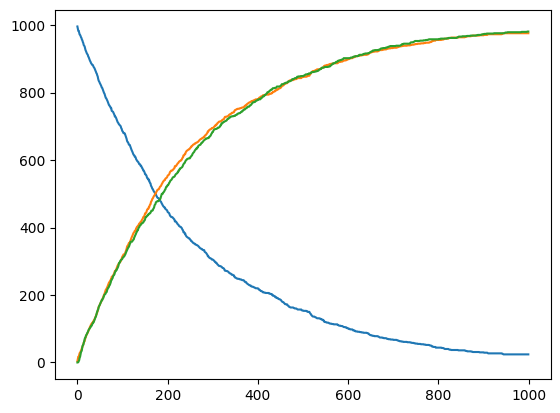

In [12]:
N = 1000
tl_sample = N
tl_samples = []
pb_samples = []
tau = 3.052 * 60
for t in range(1000):
    mask_decayed = npr.random(size=tl_sample) < (1 - np.power(2, -1/tau))
    decayed = np.sum(mask_decayed)
    tl_sample -= decayed

    tl_samples.append(tl_sample)
    pb_samples.append(N - tl_sample)

    if tl_sample == 0:
        break

plt.figure()
plt.plot(tl_samples)
plt.plot(pb_samples)

def expon_icdf(z, tau):
    return -np.log2(1 - z) * tau

time_range = np.arange(0,1000,1)
u = np.random.random(N)
v = expon_icdf(u, tau)

not_decayed = []
for t in time_range:
    not_decayed.append(np.sum(v < t))

plt.plot(not_decayed)


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

7.549298542627981e-17 5.295223145193259e-13
Colpite: 1572, Frazione:  0.16%


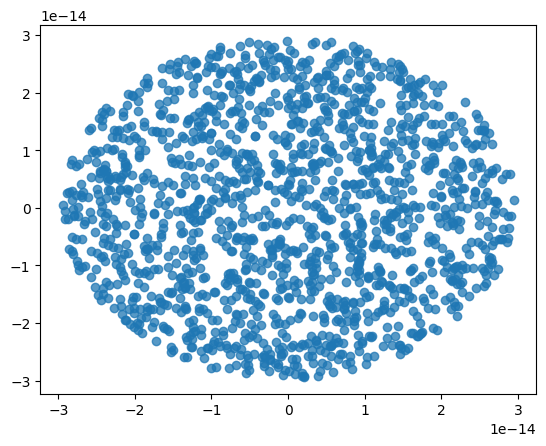

In [4]:

e = 1.60217663 * 1e-19
E = 7.7e6 * e
a0 = 5.29177e-11
e0 = 8.854187e-12
sigma = a0 / 100
Z = 79

N = 1_000_000
data = np.random.multivariate_normal(mean=[0,0], cov=[[sigma**2,0],[0, sigma**2]], size=N)
print(np.mean(data), np.std(data))
distances = np.linalg.norm(data, axis=1)
value = Z * e * e / (2 * np.pi * e0 * E)

mask = distances < value
print(f"Colpite: {np.sum(mask)}, Frazione: {np.sum(mask)/N * 100: .2g}%")

plt.scatter(data[mask][:, 0], data[mask][:, 1], alpha=0.75)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

1.451512 0.00028
1.4512763462498757 0.00032473143773915545


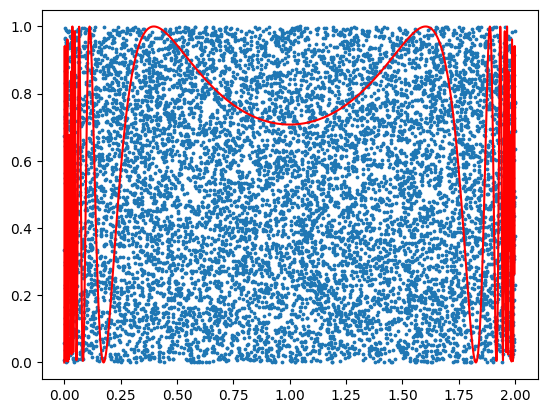

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.power(np.sin(1 / (x * (2-x))), 2)

def generate_2d_random(x_lim, y_lim, n):
    return np.random.uniform(low=[x_lim[0], y_lim[0]], high=[x_lim[1], y_lim[1]], size=(n, 2))

N = 10000000
x_lim = (0, 2)
y_lim = (0, 1)
area =  np.dot(x_lim, y_lim)
dataset = generate_2d_random(x_lim,  y_lim, N)
max_plot =  int(min(N, 1e4))
plt.scatter(dataset[:max_plot, 0], dataset[:max_plot, 1], s=3)
x_range = np.linspace(1e-10, 2-(1e-10), 1000)
plt.plot(x_range, f(x_range), color="red")

mask = dataset[:, 1] < f(dataset[:, 0])
p =(np.sum(mask) / N)
integral = p * area
error = area * np.sqrt(p * (1-p)/ N)

print(integral, f"{error:.2g}")


#metodo mean value

dataset2 = np.random.random(size=N) * (x_lim[1] - x_lim[0]) + x_lim[0]
f_values = f(dataset2)
value = np.sum(f_values) *  (x_lim[1] - x_lim[0]) / N
err2 = (x_lim[1] - x_lim[0]) * np.sqrt(np.std(f_values)/N)
print(value, err2)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [55]:
import matplotlib.pyplot as plt

def f(z):
    return np.sum(np.power(z, 2), axis=1) <= 1

N = 100000
rep = 100
area = 4
total_n = 0
integral = 0
for k in range(rep):
    total_n += N
    data = np.random.random(size=(N, 2))
    data = data * 2 - 1

    # plt.scatter(data[:, 0], data[:, 1], s=3)
    integral += np.sum(f(data))
    # print(integral)

print(integral / total_n * area)

d = 10
aread = 2 ** d
integral = 0
total_n = 0
for k in range(rep):
    total_n += N
    data = np.random.random(size=(N, d))
    data = data * 2 - 1
    integral += np.sum(f(data))
    
print(integral / total_n * aread)


3.1406916
2.54208


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
def integrand(x):
    return np.power(x, -0.5) / (np.exp(x) + 1)

def w(x):
    return 1 / (np.sqrt(x) * 2) # normalized for 0-1

def w_icdf(z):
    return np.power(z, 2) # normalized for 0-1


n = 100000
rep = 100
tot = 0
for k in range(rep):
    ran = np.random.random(n)
    y = w_icdf(ran)
    tot += np.sum(integrand(y)/w(y))

h_is = 1.0/(n * rep) * tot
print ("estimate:", h_is)
print("real value:", 0.8389329600133814)

estimate: 0.8389729781446487
real value: 0.8389329600133814
